In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import glob

In [65]:
ages_seleccionadas = gpd.read_file("geodata.gpkg")
ages_seleccionadas = ages_seleccionadas.to_crs("EPSG:4326")
ages_seleccionadas = ages_seleccionadas[["CVEGEO", "CVE_ENT", "CVE_MUN", "CVE_LOC", "CVE_AGEB", "metrica", "geometry"]]
ages_seleccionadas = gpd.GeoDataFrame(ages_seleccionadas, geometry=ages_seleccionadas.geometry)
ages_seleccionadas.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,metrica,geometry
0,060020001127A,06,002,0001,127A,0.551410,"POLYGON ((-103.73577 19.24392, -103.73577 19.2..."
1,0600200010731,06,002,0001,0731,0.541942,"POLYGON ((-103.73430 19.24640, -103.73432 19.2..."
2,0600200011513,06,002,0001,1513,0.539966,"POLYGON ((-103.73608 19.24041, -103.73623 19.2..."
3,0600200010746,06,002,0001,0746,0.504686,"POLYGON ((-103.72441 19.23889, -103.72539 19.2..."
4,0600200011176,06,002,0001,1176,0.499525,"POLYGON ((-103.74281 19.24436, -103.74298 19.2..."


In [66]:
ages_seleccionadas.to_file("geodata3464.gpkg", driver="GPKG")

In [68]:
# rank based on "metrica" column and grouping by "CVEGEO"
df = pd.DataFrame()

for mun_str, mun in ages_seleccionadas.groupby("CVE_MUN"):
    mun = mun.sort_values("metrica", ascending=True)
    
    mun["rank"] = range(1, len(mun) + 1)
      
    df = pd.concat([df, mun], axis=0)

df = gpd.GeoDataFrame(df, geometry="geometry")

In [69]:
df.to_file("geodata3464.gpkg", driver="GPKG")

In [56]:
manzanas = gpd.read_file('manzanas_sedatu.gpkg')
manzanas = manzanas.to_crs(epsg=4326)
manzanas = manzanas[["CVEGEO","CVE_AGEB", "CVE_MZA", "Nom_Ent", "Nom_Mun", "Nom_Loc", "geometry"]]
clve = [x[:13] for x in manzanas["CVEGEO"].astype(str)]
manzanas["CVEGEO"] = clve
manzanas.head()

,CVEGEO,CVE_AGEB,CVE_MZA,Nom_Ent,Nom_Mun,Nom_Loc,geometry
0,0600100010397,0397,013,Colima,Armería,Ciudad de Armería,"MULTIPOLYGON (((-103.97228 18.93379, -103.9723..."
1,0600100010151,0151,034,Colima,Armería,Ciudad de Armería,"MULTIPOLYGON (((-103.96700 18.94357, -103.9670..."
2,0600100010202,0202,020,Colima,Armería,Ciudad de Armería,"MULTIPOLYGON (((-103.96228 18.93442, -103.9622..."
3,0600100070236,0236,029,Colima,Armería,Cofradía de Juárez,"MULTIPOLYGON (((-103.95354 18.96149, -103.9544..."
4,0600100070221,0221,020,Colima,Armería,Cofradía de Juárez,"MULTIPOLYGON (((-103.95609 18.96076, -103.9561..."


In [57]:
gdf = pd.merge(df, manzanas, on=["CVEGEO","CVE_AGEB"], how="inner")
gdf = gpd.GeoDataFrame(gdf, geometry="geometry")
gdf.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,metrica,rank,CVE_MZA,Nom_Ent,Nom_Mun,Nom_Loc,geometry
0,0600200011176,06,002,0001,1176,0.499525,1,042,Colima,Colima,Colima,"MULTIPOLYGON (((-103.74815 19.23763, -103.7483..."
1,0600200011176,06,002,0001,1176,0.499525,1,018,Colima,Colima,Colima,"MULTIPOLYGON (((-103.74985 19.23341, -103.7499..."
2,0600200011176,06,002,0001,1176,0.499525,1,017,Colima,Colima,Colima,"MULTIPOLYGON (((-103.75203 19.23378, -103.7509..."
3,0600200011176,06,002,0001,1176,0.499525,1,019,Colima,Colima,Colima,"MULTIPOLYGON (((-103.74872 19.23323, -103.7488..."
4,0600200011176,06,002,0001,1176,0.499525,1,027,Colima,Colima,Colima,"MULTIPOLYGON (((-103.74672 19.24140, -103.7470..."


<Axes: >

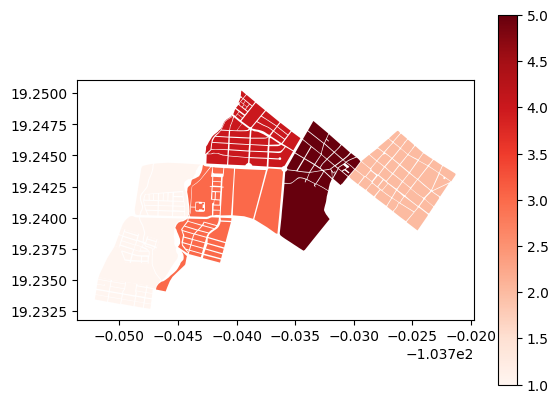

In [58]:
[gdf["CVE_MUN"] == '002'].plot(column='rank', cmap='Reds', legend=True)

In [62]:
# export gdf to kml
# https://geopandas.org/gallery/plotting_with_geoplot.html

gdf.to_file("oliver_googleearth.gpkg", driver="GPKG")